# **Homework Assignment #1**

# Problem 1
<h3>Erosion and Dilation-Coding</h3>
<h2>Part A</h2>
Based on the reading assignment construct OpenCV solution for Erosion and Dilation.

In [10]:
import os,sys
import cv2
from matplotlib import pyplot as plt           
import numpy as np
import glob
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
path = '/home/CV/images/'

# Function to locate folder with all images to be read. Returns np.array of read images
def read(image_path,conversion=0):
    image_files = glob.glob(os.path.join(image_path,'*'))
    result = numpy.empty(len(image_files), dtype=object)

    for i in range(0,len(image_files)):
        result[i] = cv2.imread(image_files[i],conversion)
    return result
        
readImgs = read(path)

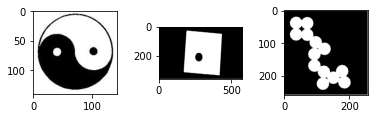

In [138]:
# Function to show original imgs in array after being read
def showImg(arr):
    for i in range(0,len(arr)):
        plt.subplot(1,3,i+1),plt.imshow(arr[i], 'gray'),plt.subplots_adjust(wspace=0.5)
    

showImg(read(path))

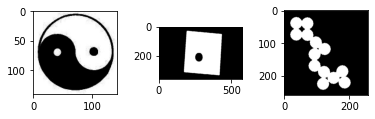

In [139]:
# Function to show eroded read images within array
def erodeImgs(arr, kernel,iterations):
    eroded = numpy.empty(len(arr), dtype=object)
    
    for i in range(0,len(arr)):
        eroded[i] = cv2.erode(arr[i],kernel,iterations)
        plt.subplot(1,3,i+1),plt.imshow(eroded[i], 'gray'),plt.subplots_adjust(wspace=0.5)
        
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

erodeImgs(readImgs,kernel,1)        

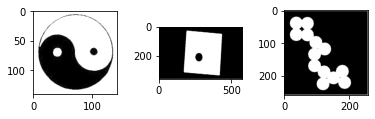

In [140]:
# Function to show dilated read images within array
def dilateImgs(arr, kernel,iterations):
    dilated = numpy.empty(len(arr), dtype=object)
    
    for i in range(0,len(arr)):
        dilated[i] = cv2.dilate(arr[i],kernel,iterations)
        plt.subplot(1,3,i+1),plt.imshow(dilated[i], 'gray'),plt.subplots_adjust(wspace=0.5)
        
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

dilateImgs(readImgs,kernel,1)  

<h2>Part B</h2>
Using the timing infrastructures for Python coding in OpenCV, record the execution time applied to the 3 different images included in the assignment folder.

Use the following structuring element: 5x5
<table style="width:20%">
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
</table>

In [34]:
kernel = np.array([[0, 0, 1, 0, 0], 
                   [0, 0, 1, 1, 0],
                   [0, 0, 1, 1, 1],
                   [0, 0, 1, 1, 0], 
                   [0, 0, 1, 0, 0]],dtype=np.uint8)

# Function to display execution time needed to dilate each image (excludes cv2.imread time)
def getDilateExecutionTime(arr,kernel,iterations):
    executionTimes = []
    for i in range(0, len(arr)):
        e1 = cv2.getTickCount() 
        erosion = cv2.dilate(arr[i],kernel,iterations = i)
        e2 = cv2.getTickCount()
        t = (e2 - e1)/cv2.getTickFrequency() #seconds
        executionTimes.append(t)
    return executionTimes

# Function to display execution time needed to dilate each image  (excludes cv2.imread time)
def getErodeExecutionTime(arr,kernel,iterations):
    executionTimes = []
    for i in range(0, len(arr)):
        e1 = cv2.getTickCount() 
        erosion = cv2.erode(arr[i],kernel,iterations = i)
        e2 = cv2.getTickCount()
        t = (e2 - e1)*1000/cv2.getTickFrequency() 
        executionTimes.append(t)
    return executionTimes
    
print('Dilation times: ' + str(getDilateExecutionTime(readImgs,kernel,1)))
print('Erode times: ' + str(getErodeExecutionTime(readImgs,kernel,1)))

Dilation times: [1.6689e-05, 8.107e-05, 6.1504e-05]
Erode times: [0.006679, 0.083786, 0.229695]


<h2>Part C and D</h2>
Plot the execution time for each image for running Erosion and Dilation using # iterations: 1,2,4,6,16,32

Text(0.5, 1.0, 'Picture 3 Dilation')

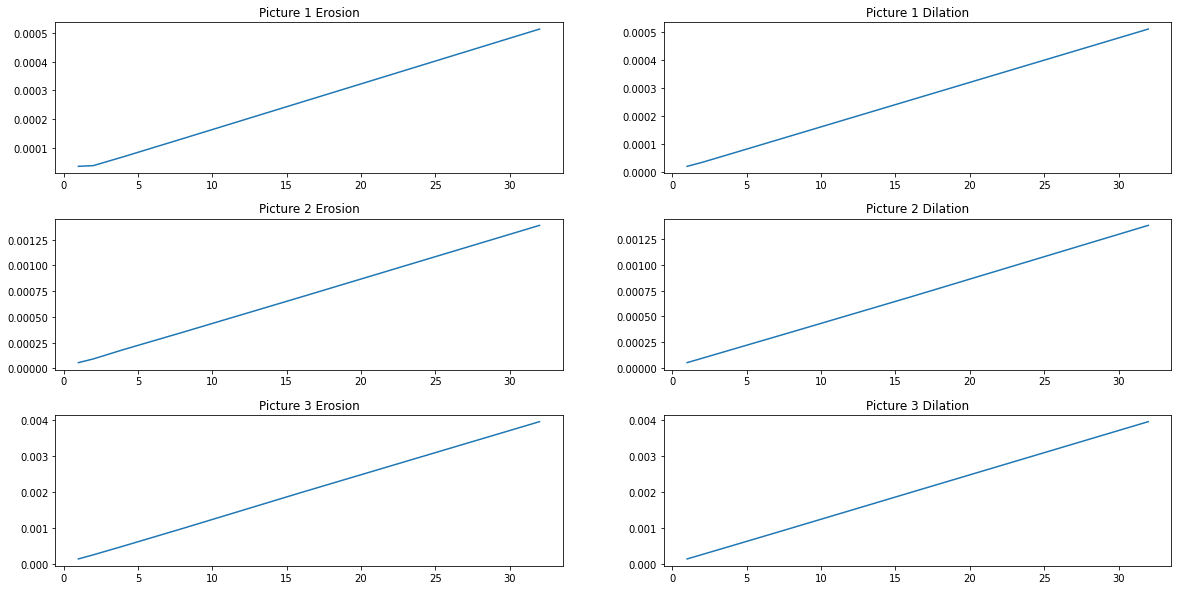

In [42]:
def getErodeDilateTimes(img,kernel,iterations):
    erodeTimes = []
    dilateTimes = []
    
    for i in iterations:
        e1 = cv2.getTickCount() 
        cv2.erode(img,kernel,iterations = i)
        e2 = cv2.getTickCount()
        t = (e2 - e1)/cv2.getTickFrequency() 
        erodeTimes.append(t)
        
    for i in iterations:
        e1 = cv2.getTickCount() 
        cv2.dilate(img,kernel,iterations = i)
        e2 = cv2.getTickCount()
        t = (e2 - e1)/cv2.getTickFrequency() 
        dilateTimes.append(t)

    return [erodeTimes, dilateTimes]

read1 = cv2.imread('/home/CV/images/Picture1.jpg')
read2 = cv2.imread('/home/CV/images/Picture2.jpg')
read3 = cv2.imread('/home/CV/images/Picture3.jpg')

kernel = np.array([[0, 0, 1, 0, 0], 
                   [0, 0, 1, 1, 0],
                   [0, 0, 1, 1, 1],
                   [0, 0, 1, 1, 0], 
                   [0, 0, 1, 0, 0]],dtype=np.uint8)

iterations = [1,2,4,8,16,32]
    
x = np.array([1,2,4,8,16,32])
y1 = getErodeDilateTimes(read1,kernel,iterations)
y2 = getErodeDilateTimes(read2,kernel,iterations)
y3 = getErodeDilateTimes(read3,kernel,iterations)

fig, axs = plt.subplots(3, 2,figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0][0].plot(x, y1[0])
axs[0][0].set_title('Picture 1 Erosion')
axs[0][1].plot(x, y1[1])
axs[0][1].set_title('Picture 1 Dilation')
axs[1][0].plot(x, y2[0])
axs[1][0].set_title('Picture 2 Erosion')
axs[1][1].plot(x, y2[1])
axs[1][1].set_title('Picture 2 Dilation')
axs[2][0].plot(x, y3[0])
axs[2][0].set_title('Picture 3 Erosion')
axs[2][1].plot(x, y3[1])
axs[2][1].set_title('Picture 3 Dilation')